# Week5

PCA를 사용하여 차원을 줄이고 원본 데이터로 학습시킨 모델과의 성능 및 훈련 시간 비교를 해본다.  
PCA는 분산의 80%를 유지하도록 하여 중요한 정보를 잃지 않도록 했다.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
'''
    Pregnancies: 임신 횟수
    Glucose: 포도당 수치
    BloodPressure: 혈압
    SkinThickness: 피부 두께
    Insulin: 인슐린 수치
    BMI: 체질량지수 (BMI)
    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수
    Age: 나이
    Outcome: 결과 (당뇨병 여부)
'''

'\n    Pregnancies: 임신 횟수\n    Glucose: 포도당 수치\n    BloodPressure: 혈압\n    SkinThickness: 피부 두께\n    Insulin: 인슐린 수치\n    BMI: 체질량지수 (BMI)\n    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수\n    Age: 나이\n    Outcome: 결과 (당뇨병 여부)\n'

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_12332\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


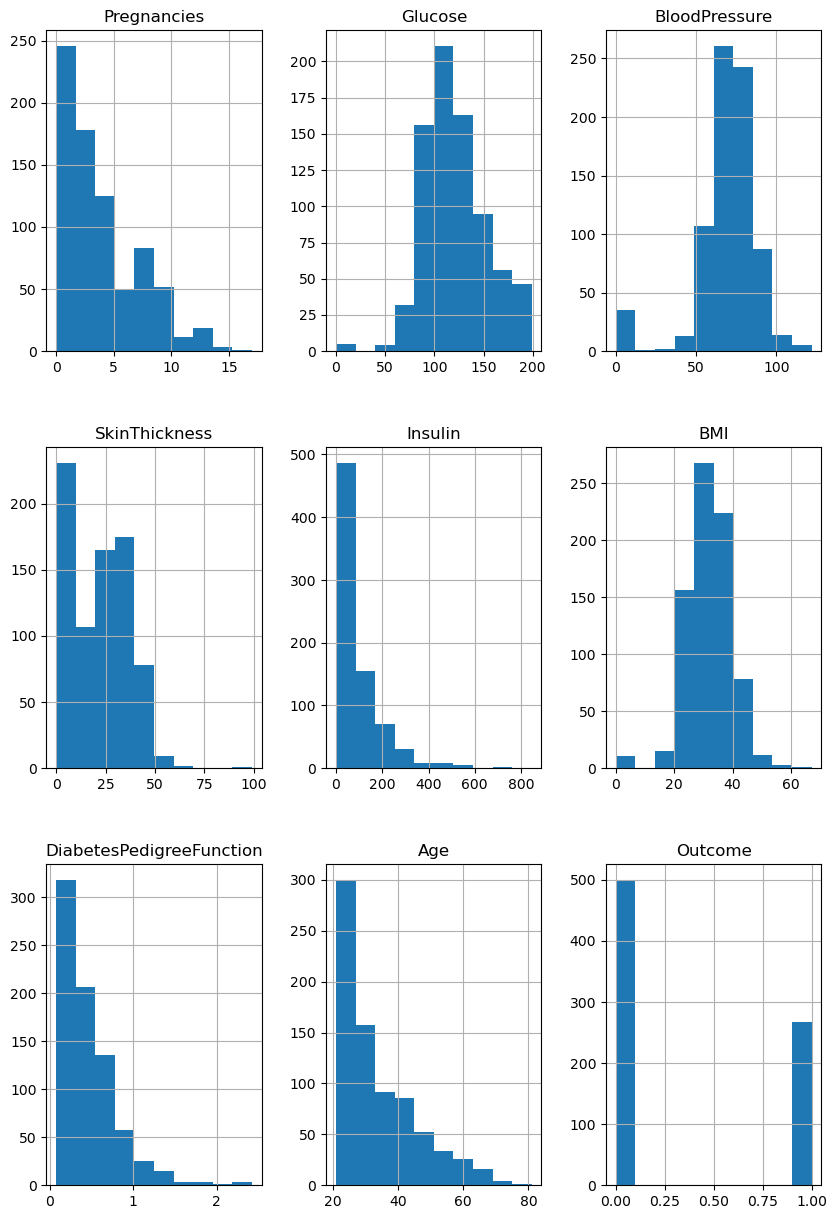

In [9]:
# 시각화
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [10]:
# dirty data 비율 확인
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
tot_data = df.shape[0]

for feat in zero_features:
    zero_cnt = df[df[feat] == 0][feat].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2: .2f}%'.format(feat, zero_cnt, 100 * (zero_cnt / tot_data)))

Glucose 0 건수는 5, 퍼센트는  0.65%
BloodPressure 0 건수는 35, 퍼센트는  4.56%
SkinThickness 0 건수는 227, 퍼센트는  29.56%
Insulin 0 건수는 374, 퍼센트는  48.70%
BMI 0 건수는 11, 퍼센트는  1.43%


In [11]:
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

Text(0.5, 1.0, 'Outcome')

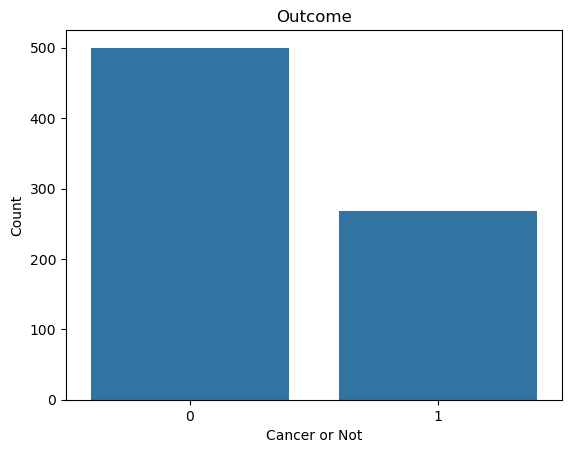

In [12]:
# 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [13]:
# Outcome 개수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# one-hot encode label
y = pd.get_dummies(y).values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

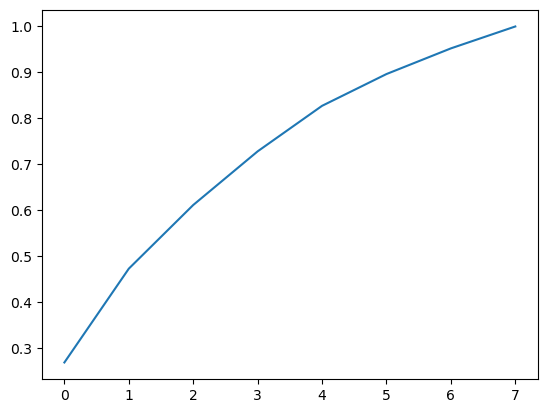

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [19]:
# 80% 분산 보존하는 차원 수 선택 
d = np.argmax(cumsum >= 0.8) + 1 
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [30]:
X_train.shape, X_reduced.shape

((576, 8), (576, 5))

In [21]:
from tensorflow import keras
def construct_model(input_size):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(input_size,)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(2, activation='sigmoid'))
    return model

In [22]:
def train_plot(X, y, title):
    model = construct_model(X.shape[1])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
    history = model.fit(X, y, validation_split=0.2, 
                    verbose=0, epochs=20, batch_size=32, callbacks=[early_stopping_cb])
    
        # 손실 곡선
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'validation'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'{title}')
    plt.show()

    return model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,538 (37.26 KB)

 Trainable params: 9,538 (37.26 KB)

 Non-trainable params: 0 (0.00 B)

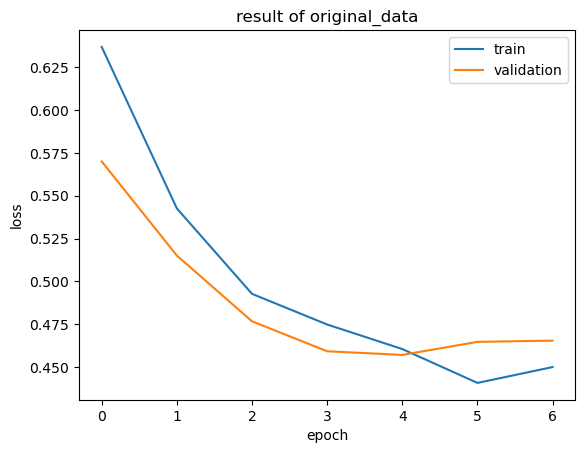

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.7916666666666666
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       125
           1       0.74      0.63      0.68        67

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



In [24]:
from sklearn.metrics import classification_report, accuracy_score

model = train_plot(X_train, y_train, 'result of original_data')
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 9,154 (35.76 KB)

 Non-trainable params: 0 (0.00 B)

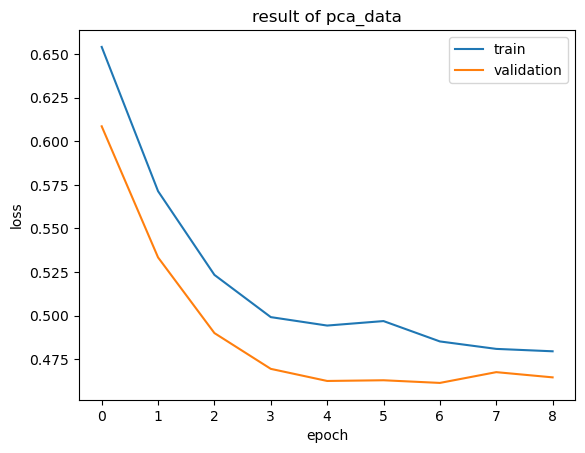

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.7604166666666666
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       125
           1       0.71      0.54      0.61        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [28]:
model = train_plot(X_reduced, y_train, 'result of pca_data')
y_pred = model.predict(X_test_reduced)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

분산을 80% 유지하도록 하여 차원을 기존 8에서 5로 줄였다. 그러나 훈련 시간과 성능에 차이가 크지 않다. 데이터 셋 크기가 작아서 그런 것 같다.